# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def recursiveT(hist, Tinit,grayLevels,pixelCount):
    histLowerTinit = hist[grayLevels<Tinit]
    grayLevelLower = grayLevels[grayLevels<Tinit]

    histHigherTinit = hist[grayLevels>=Tinit]
    grayLevelHigher = grayLevels[grayLevels>=Tinit]

    histPerkHigher = np.sum(np.multiply(histHigherTinit,grayLevelHigher))
    pixelCountHigher = np.cumsum(histHigherTinit)
    histPerkLower = np.sum(np.multiply(histLowerTinit,grayLevelLower))
    pixelCountLower = np.cumsum(histLowerTinit)

    FinalTinit = round((histPerkHigher/pixelCountHigher[-1] + histPerkLower/pixelCountLower[-1])/2)
    if (FinalTinit in range(Tinit-1,Tinit+1)):
        return FinalTinit
    return recursiveT(hist,FinalTinit,grayLevels,pixelCount)

def getThreshold(img):
    image = np.copy(img)
    maxValue = np.max(image)
    if maxValue < 1:
        image = np.multiply(image, 255)
    image = image.astype('uint8')
    hist, grayLevels = histogram(image)
    histPerk = 0
    # for i in range(0, len(hist)):
    #     histPerk += i * hist[i]
    histPerk = np.sum(np.multiply(hist,grayLevels))
    pixelCount = np.cumsum(hist)
    Tinit =  round(histPerk / pixelCount[-1])
    return recursiveT(hist,Tinit,grayLevels,pixelCount)
    

bookT = 138 cameramanT = 89


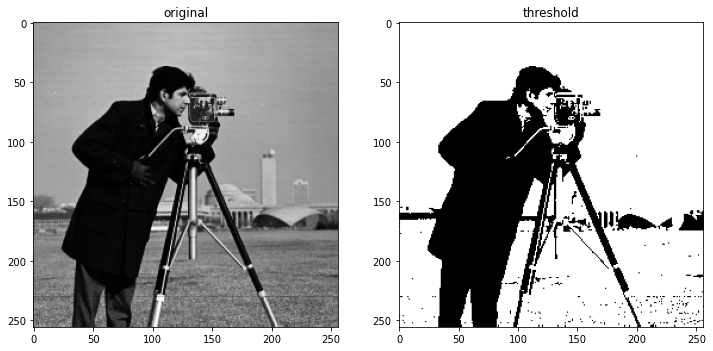

In [6]:
book = io.imread("./book.png")
cameraman = io.imread("./cameraman.png")
cameramanOrig = np.copy(cameraman)
bookT = getThreshold(book)
cameramanT = getThreshold(cameraman)
print("bookT = " + str(bookT) + " cameramanT = " + str(cameramanT))
book[book<bookT] = 0
book[book>=bookT] = 255
cameraman[cameraman<cameramanT] = 0
cameraman[cameraman>=cameramanT] = 255
show_images([cameramanOrig,cameraman],["original","threshold"])


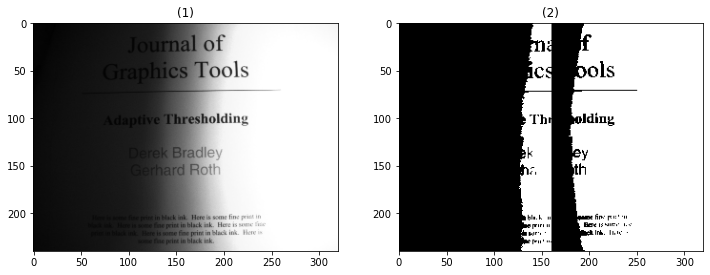

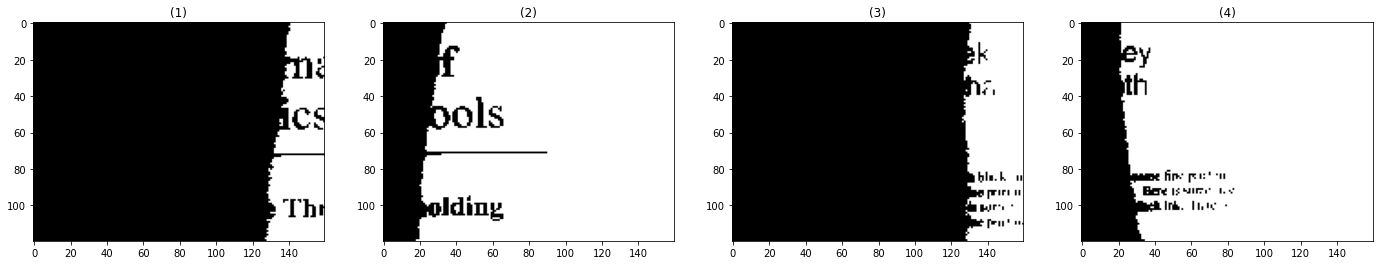

In [4]:
book = io.imread("./book.png")  
bookOrg = io.imread("./book.png")  
P1X = round(book.shape[0]/4)
P1Y = round(book.shape[1]/4)
P2X = round(book.shape[0]/2)
P2Y = round(book.shape[1]/2)
P3X = round(3*book.shape[0]/4)
P3Y = round(3*book.shape[1]/4)
P4X = round(book.shape[0])
P4Y = round(book.shape[1])

bookP1 = book[0:P2X,0:P2Y]
bookP2 = book[0:P2X,P2Y:P4Y]
bookP3 = book[P2X:P4X,0:P2Y]
bookP4 = book[P2X:P4X,P2Y:P4Y]

book1T = getThreshold(bookP1)
book2T = getThreshold(bookP2)
book3T = getThreshold(bookP3)
book4T = getThreshold(bookP4)

bookP1[bookP1<book1T] = 0
bookP1[bookP1>=book1T] = 255
bookP2[bookP2<book2T] = 0
bookP2[bookP2>=book2T] = 255
bookP3[bookP3<book3T] = 0
bookP3[bookP3>=book3T] = 255
bookP4[bookP4<book4T] = 0
bookP4[bookP4>=book4T] = 255
book[0:P2X,0:P2Y]     = bookP1
book[0:P2X,P2Y:P4Y] = bookP2
book[P2X:P4X,0:P2Y] = bookP3
book[P2X:P4X,P2Y:P4Y] = bookP4

show_images([bookOrg,book])
show_images([bookP1,bookP2,bookP3,bookP4])